<a href="https://colab.research.google.com/github/marcosjsh/FIAP_IA/blob/main/FIAP_DesafioMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configurações básicas do projeto**

In [42]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# **Importação dos dados para análise**

In [43]:
import pandas as pd

dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Entendendo melhor os dados**

In [44]:
dataset.shape

(1338, 7)

Temos ao todo 1338 linhas e 7 colunas

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Nem todas as colunas são de valores númericos

In [46]:
set(dataset['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

Verificamos quantas regiões estão contempladas na amostragem

In [47]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Verificamos acima a distribuição dos segurados pela regiões do país

In [48]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Verificamos a amostragem dividida por sexo

In [49]:
dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Verificamos quantas pessoas tem "x" filhos

In [50]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Quantos são fumantes ou não

In [51]:
dataset['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

Também verificamos quantos segurados por idade

Levando em conta apenas os campos numéricos, temos as seguintes informações

In [52]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Vamos analisar a distribuição dos dados com o uso de histogramas

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

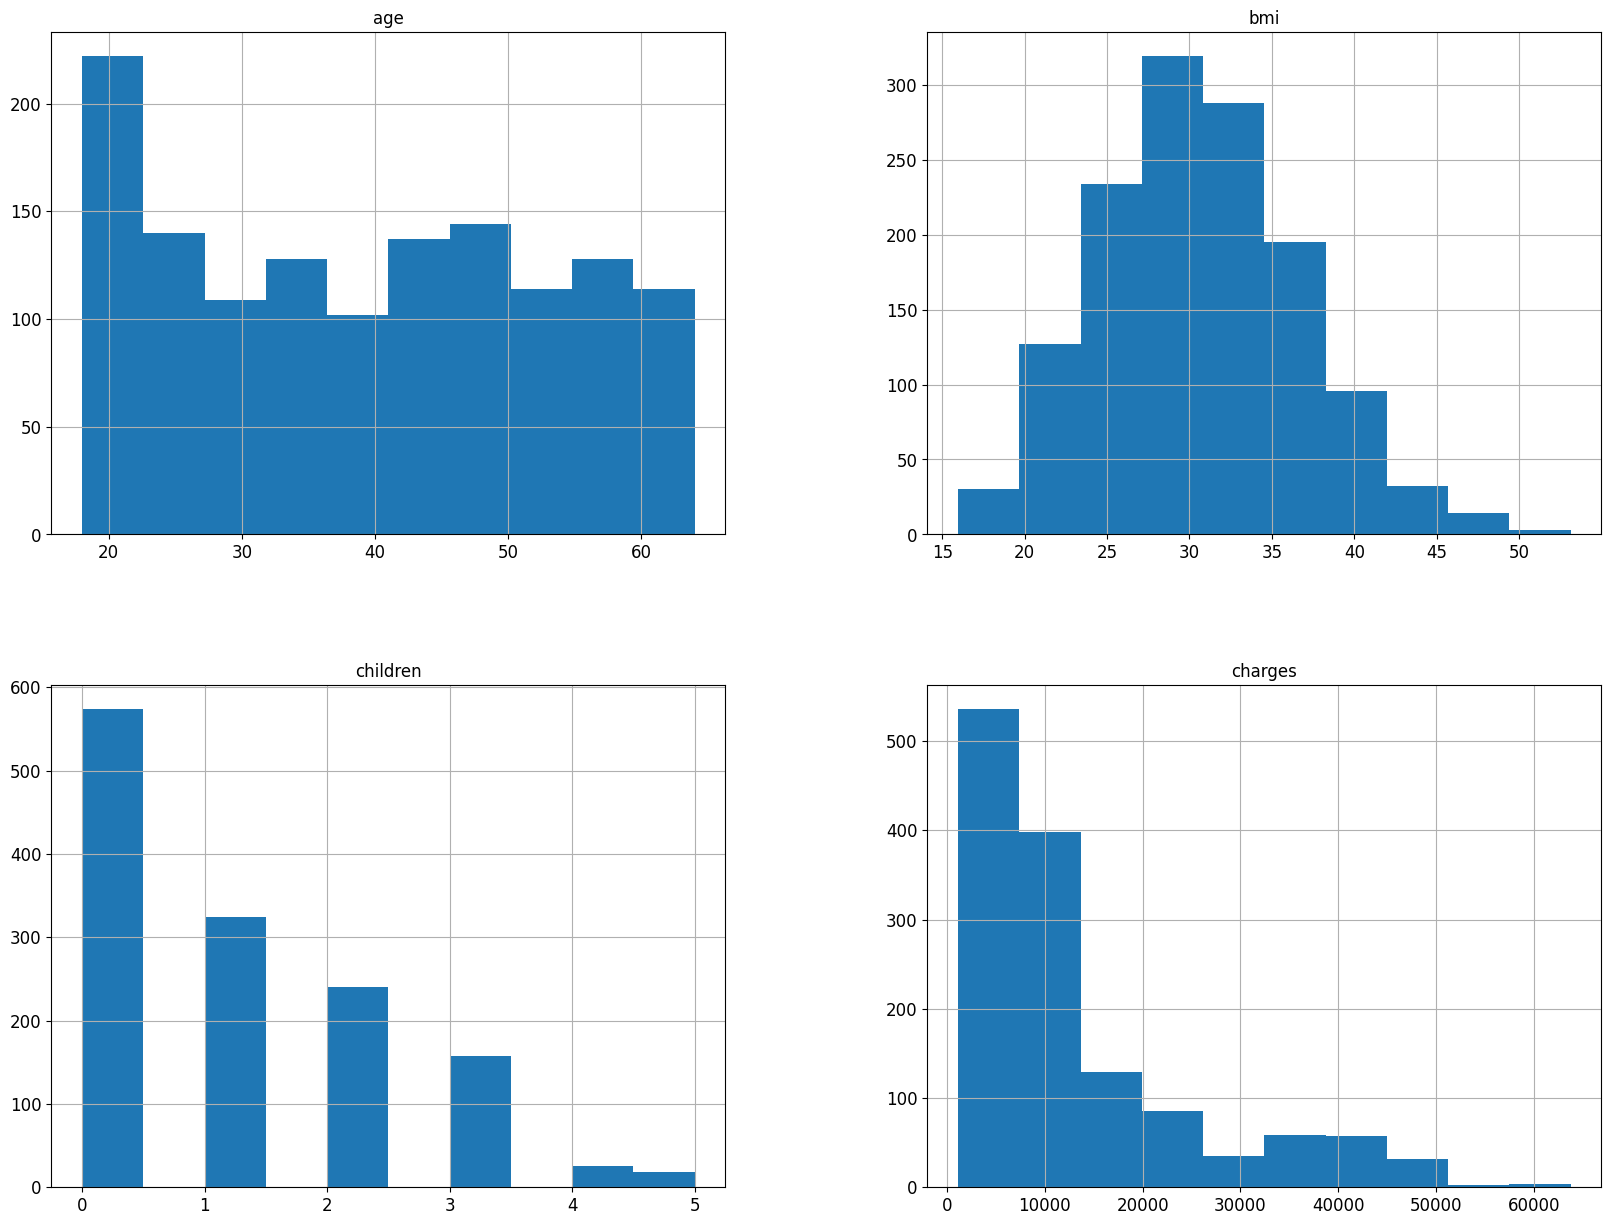

In [53]:
dataset.hist(bins=10, figsize=(20,15))

*A variável **"charges"** será o nosso target neste desafio*

# **Separação da base de dados em treino e teste**

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)

In [55]:
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


# **Dividindo em categorias de idade**

Sabemos que um dos fatores que mais influenciam o preço do seguro de saúde, é a idade do segurado. Vamos dividir os dados por faixas de idade para ter uma visão melhor

<Axes: >

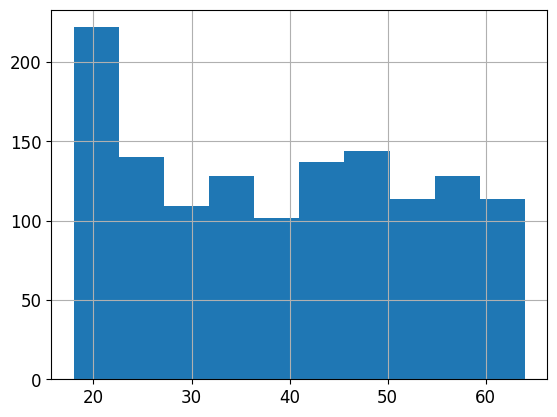

In [56]:
dataset["age"].hist()

Vamos dividir em faixas de 10 anos cada e considerar todos aqueles acima de 60 anos, como tendo 60 anos.
Assim, criamos categorias discretas, dividindo em intervalos de 10 anos.

In [57]:
dataset["age_cat"] = np.ceil(dataset["age"] / 10.0)
dataset["age_cat"].where(dataset["age_cat"] < 60, 60.0, inplace=True)

In [58]:
dataset["age_cat"] = pd.cut(dataset["age"],
                            bins=[0., 10., 20., 30., 40., 50., 60., np.inf],
                            labels=[0, 10, 20, 30, 40, 50, 60])

In [59]:
dataset["age_cat"].value_counts()

age_cat
40    281
20    278
50    265
30    257
10    166
60     91
0       0
Name: count, dtype: int64

<Axes: >

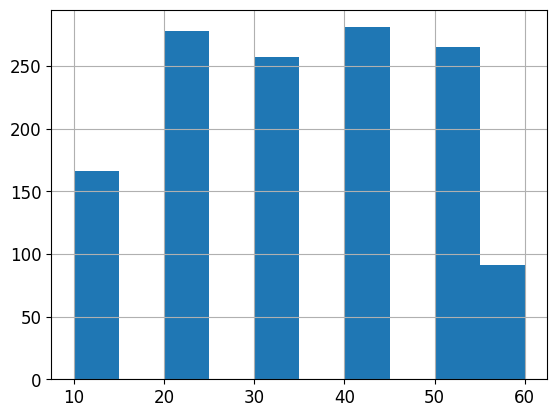

In [60]:
dataset["age_cat"].hist()

Vamos preparar uma amostragem estratificada

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["age_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

Analisamos as proporções nas bases de teste e treino, além da base toda


In [62]:
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

age_cat
20    0.208955
40    0.208955
50    0.197761
30    0.194030
10    0.123134
60    0.067164
0     0.000000
Name: count, dtype: float64

In [63]:
strat_train_set["age_cat"].value_counts() / len(strat_train_set)

age_cat
40    0.210280
20    0.207477
50    0.198131
30    0.191589
10    0.124299
60    0.068224
0     0.000000
Name: count, dtype: float64

In [64]:
dataset["age_cat"].value_counts() / len(dataset)

age_cat
40    0.210015
20    0.207773
50    0.198057
30    0.192078
10    0.124066
60    0.068012
0     0.000000
Name: count, dtype: float64

*Os números são muito parecidos tanto na base de teste como na de treino*

Antes de prosseguir, devemos remover a coluna "age_cat" que foi usada como variável auxiliar

In [65]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

# **Analisando idade x despesas**

In [66]:
insured_base = strat_train_set.copy()

<Axes: xlabel='charges', ylabel='age'>

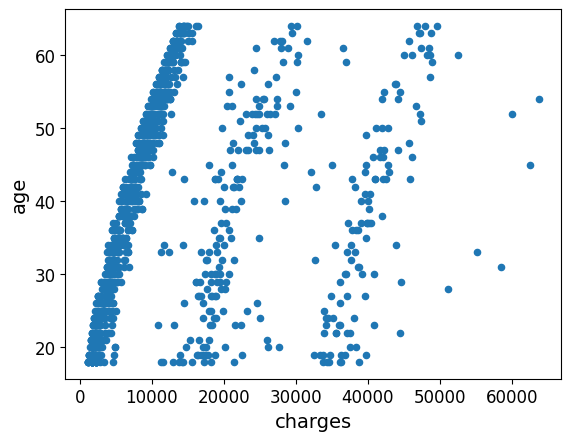

In [109]:
insured_base.plot(kind="scatter", x="charges", y="age")

<Axes: xlabel='charges', ylabel='age'>

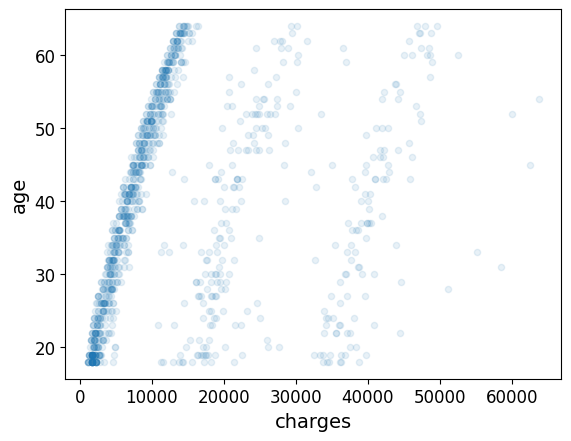

In [110]:
insured_base.plot(kind="scatter", x="charges", y="age", alpha=0.1)

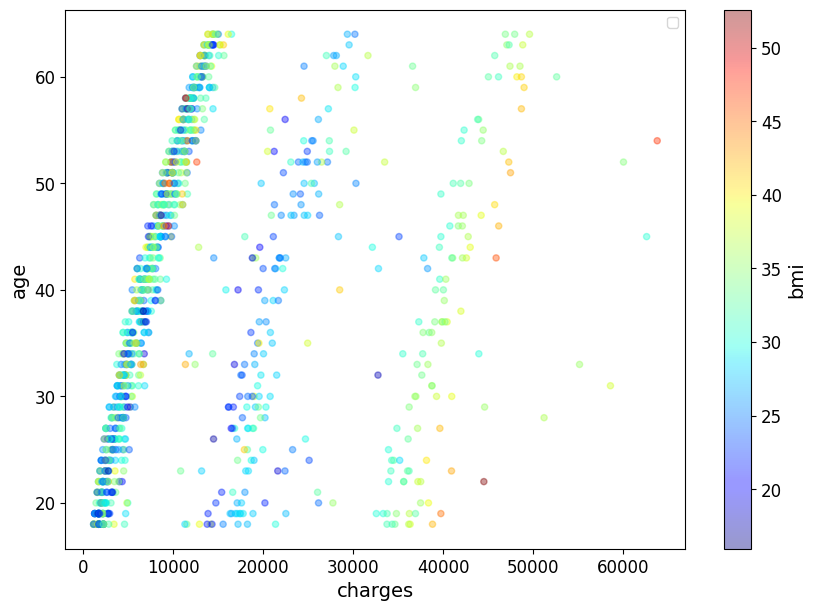

In [111]:
insured_base.plot(kind="scatter", x="charges", y="age", alpha=0.4, figsize=(10,7), c="bmi", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

Aqui acrescentamos na análise o bmi e constatamos que não é apenas a idade que afeta os custos. Indivíduos obesos tendem a ter custos maiores também.

# **Correlações**

In [70]:
print(insured_base)

      age     sex     bmi  children smoker     region      charges
75     57    male  34.010         0     no  northwest  11356.66090
269    49    male  25.840         1     no  northeast   9282.48060
461    42    male  30.000         0    yes  southwest  22144.03200
443    59  female  36.520         1     no  southeast  28287.89766
557    34    male  34.210         0     no  southeast   3935.17990
...   ...     ...     ...       ...    ...        ...          ...
531    62  female  31.730         0     no  northeast  14043.47670
1068   63    male  21.660         1     no  northwest  14349.85440
604    19  female  28.310         0    yes  northwest  17468.98390
1018   54  female  35.815         3     no  northwest  12495.29085
311    19  female  24.700         0     no  southwest   1737.37600

[1070 rows x 7 columns]


A nossa matriz possui diversos campos que não são numéricos. Para traçar uma correlação de dados, vamos normalizar isso.

In [77]:
insured_base_copy = insured_base.copy()

insured_base_copy['sex'] = insured_base_copy['sex'].map({'male': 0, 'female': 1})
insured_base_copy['smoker'] = insured_base_copy['smoker'].map({'no': 0, 'yes': 1})

Vamos "dropar" a coluna de "region" pois ela não é relevante no momento.

In [84]:
insured_base_copy = insured_base_copy.drop(columns=['region'])

In [85]:
print(insured_base_copy)

      age  sex     bmi  children  smoker      charges
75     57    0  34.010         0       0  11356.66090
269    49    0  25.840         1       0   9282.48060
461    42    0  30.000         0       1  22144.03200
443    59    1  36.520         1       0  28287.89766
557    34    0  34.210         0       0   3935.17990
...   ...  ...     ...       ...     ...          ...
531    62    1  31.730         0       0  14043.47670
1068   63    0  21.660         1       0  14349.85440
604    19    1  28.310         0       1  17468.98390
1018   54    1  35.815         3       0  12495.29085
311    19    1  24.700         0       0   1737.37600

[1070 rows x 6 columns]


In [86]:
corr_matrix = insured_base_copy.corr()

In [87]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.783086
age         0.276193
bmi         0.210726
children    0.059682
sex        -0.089349
Name: charges, dtype: float64

Vamos plotar os gráficos...

array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='smoker', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='smoker'>,
        <Axes: xlabel='smoker', ylabel='smoker'>,
        <Axes: xlabel='age', ylabel='smoker'>,
        <Axes: xlabel='bmi', ylabel='smoker'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>]], dtype=object)

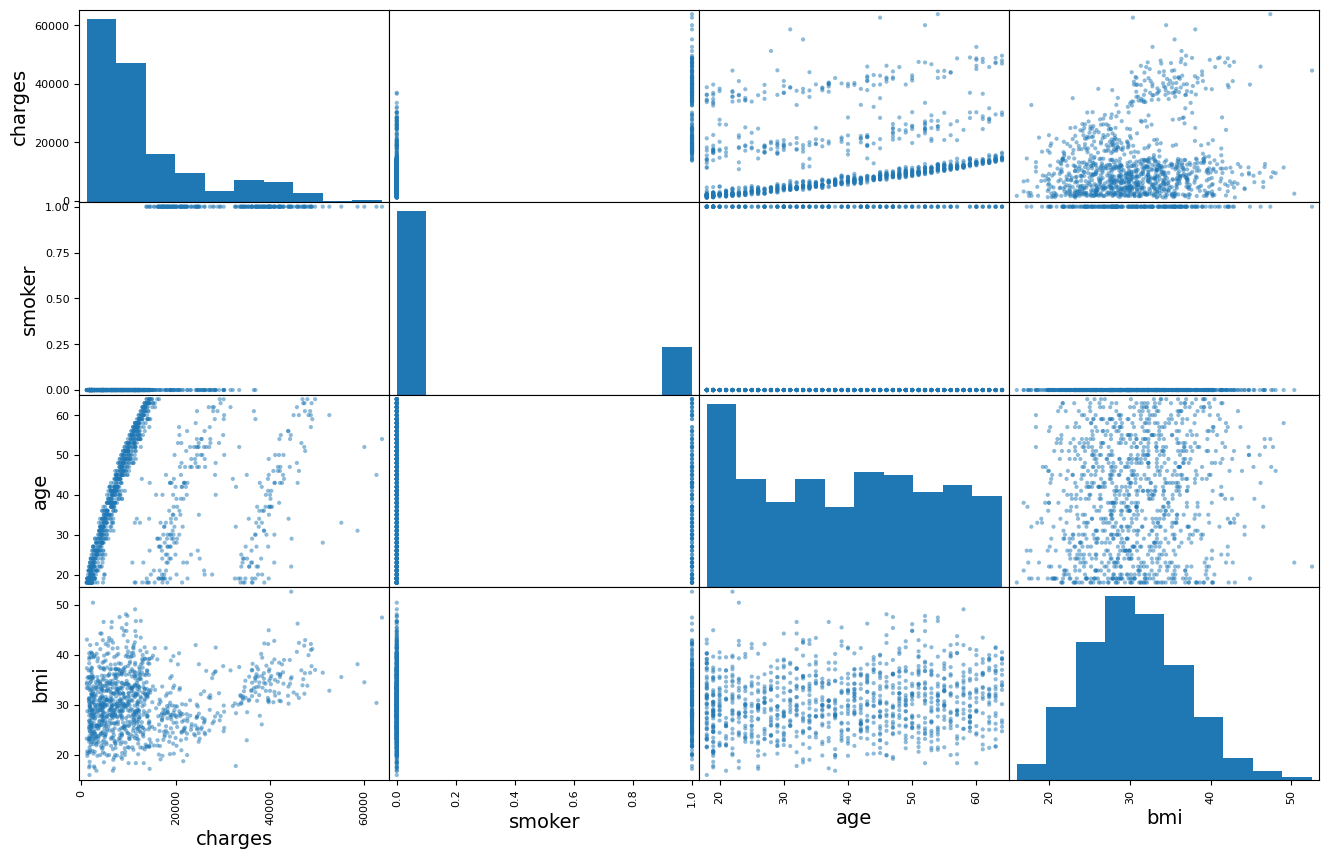

In [89]:
from pandas.plotting import scatter_matrix

attributes = ['charges', 'smoker', 'age', 'bmi']
scatter_matrix(insured_base_copy[attributes], figsize=(16,10))

Levando em conta a análise da correlação, vemos que o fator 'smoker' talvez seja a feature mais importante para prever o valor médio dos custos, seguida por 'age'.

<Axes: xlabel='charges', ylabel='age'>

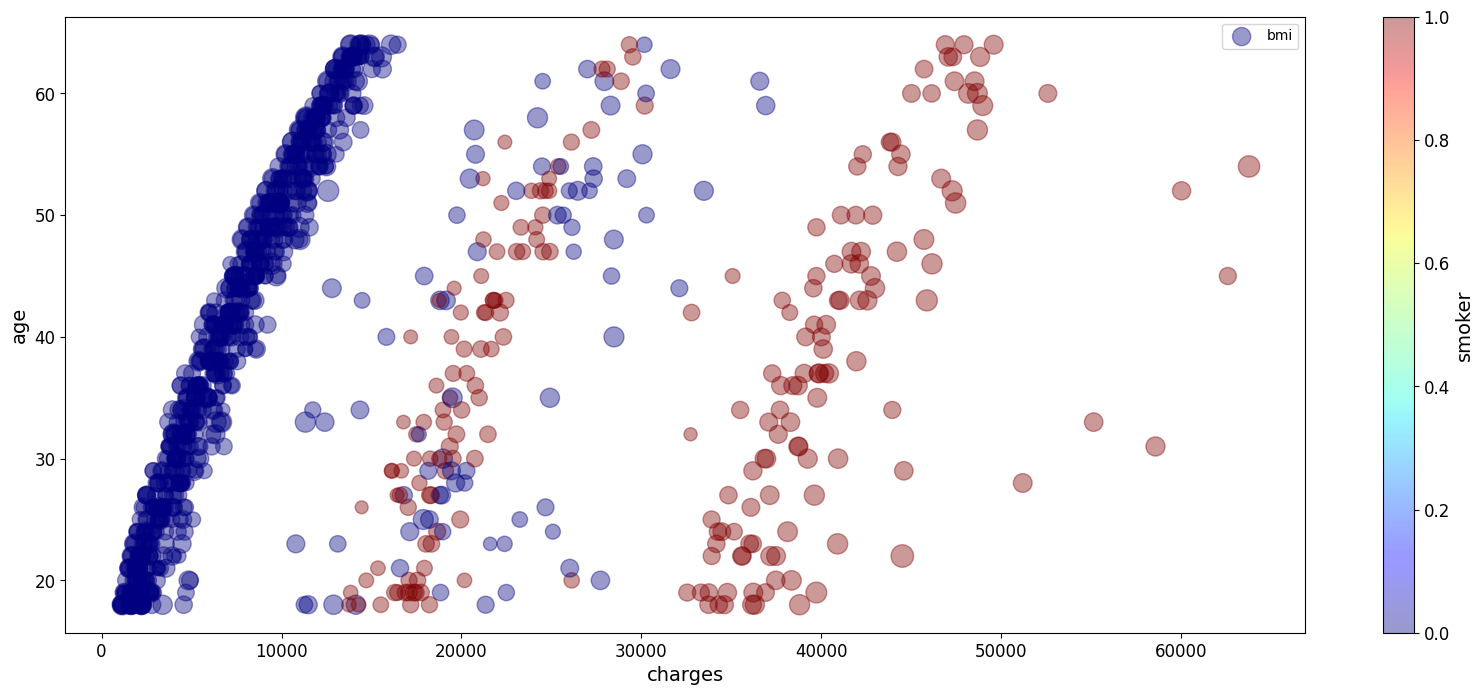

In [112]:
insured_base_copy.plot(
    kind='scatter',
    x='charges',
    y='age',
    alpha=0.4,
    s=insured_base_copy['bmi']*5,
    label='bmi',
    figsize=(20,8),
    c="smoker",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False)

A correlação nos mostra que de fato, o maior fator para o aumento de custos é se o usuário é fumante ou não. Fatores como a idade e a obesidade também influenciam, mas não tanto como se esperava.

# **Preparação dos dados para o algoritmo**

Apagamos o target da base de treino e armazenamos ele em outra variável

In [114]:
insured_base_copy = strat_train_set.drop('charges', axis=1)
insured_base_target = strat_train_set['charges'].copy()


      age     sex     bmi  children smoker     region
75     57    male  34.010         0     no  northwest
269    49    male  25.840         1     no  northeast
461    42    male  30.000         0    yes  southwest
443    59  female  36.520         1     no  southeast
557    34    male  34.210         0     no  southeast
...   ...     ...     ...       ...    ...        ...
531    62  female  31.730         0     no  northeast
1068   63    male  21.660         1     no  northwest
604    19  female  28.310         0    yes  northwest
1018   54  female  35.815         3     no  northwest
311    19  female  24.700         0     no  southwest

[1070 rows x 6 columns]


Verificamos se há colunas vazias e se necessário, tratamos elas empregando a média dos dados

In [115]:
sample_incomplete_rows = insured_base_copy[insured_base_copy.isnull().any(axis=1)].head()
sample_incomplete_rows

,age,sex,bmi,children,smoker,region


In [116]:
insured_base_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

# **Pré-Processamento das categorias**

Vamos binarizar 'sex' e 'smoker' pois estes dois elementos tem apenas 2 opções cada.


In [117]:
insured_base_copy['sex'] = insured_base_copy['sex'].map({'male': 0, 'female': 1})
insured_base_copy['smoker'] = insured_base_copy['smoker'].map({'no': 0, 'yes': 1})
insured_base_copy

,age,sex,bmi,children,smoker,region
75,57,0,34.010,0,0,northwest
269,49,0,25.840,1,0,northeast
461,42,0,30.000,0,1,southwest
443,59,1,36.520,1,0,southeast
557,34,0,34.210,0,0,southeast
...,...,...,...,...,...,...
531,62,1,31.730,0,0,northeast
1068,63,0,21.660,1,0,northwest
604,19,1,28.310,0,1,northwest
1018,54,1,35.815,3,0,northwest


No caso de 'region', vamos usar a codificação OneHotEncoder.

In [121]:
region_cat = insured_base_copy[['region']]
region_cat

,region
75,northwest
269,northeast
461,southwest
443,southeast
557,southeast
...,...
531,northeast
1068,northwest
604,northwest
1018,northwest


Removemos o atributo de texto 'region' porque a mediana só pode ser calculada em atributos numéricos

In [128]:
insured_base_copy_num = insured_base_copy.drop('region', axis=1)

In [129]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [130]:
imputer.fit(insured_base_copy_num)

SimpleImputer(strategy='median')

In [131]:
imputer.statistics_

array([39.  ,  0.  , 30.23,  1.  ,  0.  ])

In [132]:
insured_base_copy_num.median().values

array([39.  ,  0.  , 30.23,  1.  ,  0.  ])

In [133]:
X = imputer.transform(insured_base_copy_num)

In [134]:
X

array([[57.   ,  0.   , 34.01 ,  0.   ,  0.   ],
       [49.   ,  0.   , 25.84 ,  1.   ,  0.   ],
       [42.   ,  0.   , 30.   ,  0.   ,  1.   ],
       ...,
       [19.   ,  1.   , 28.31 ,  0.   ,  1.   ],
       [54.   ,  1.   , 35.815,  3.   ,  0.   ],
       [19.   ,  1.   , 24.7  ,  0.   ,  0.   ]])

In [137]:
insured_base_copy_tr = pd.DataFrame(X, columns=insured_base_copy_num.columns, index=insured_base_copy_num.index)

In [138]:
insured_base_copy_tr

,age,sex,bmi,children,smoker
75,57.0,0.0,34.010,0.0,0.0
269,49.0,0.0,25.840,1.0,0.0
461,42.0,0.0,30.000,0.0,1.0
443,59.0,1.0,36.520,1.0,0.0
557,34.0,0.0,34.210,0.0,0.0
...,...,...,...,...,...
531,62.0,1.0,31.730,0.0,0.0
1068,63.0,0.0,21.660,1.0,0.0
604,19.0,1.0,28.310,0.0,1.0
1018,54.0,1.0,35.815,3.0,0.0


In [139]:
insured_base_copy_tr.head()

,age,sex,bmi,children,smoker
75,57.0,0.0,34.01,0.0,0.0
269,49.0,0.0,25.84,1.0,0.0
461,42.0,0.0,30.00,0.0,1.0
443,59.0,1.0,36.52,1.0,0.0
557,34.0,0.0,34.21,0.0,0.0


In [140]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

In [141]:
region_cat_encoder = OneHotEncoder(sparse=False)
region_cat_1hot = region_cat_encoder.fit_transform(region_cat)
region_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [142]:
region_cat_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

# **Criação do pipeline de pré-processamento de dados**

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [144]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

insured_base_copy_num_tr = num_pipeline.fit_transform(insured_base_copy_num)

In [145]:
insured_base_copy_num_tr

array([[ 1.26959298, -0.97964634,  0.55678829, -0.91421137, -0.50874702],
       [ 0.69958795, -0.97964634, -0.79038219, -0.08662578, -0.50874702],
       [ 0.20083355, -0.97964634, -0.10443002, -0.91421137,  1.96561348],
       ...,
       [-1.43793091,  1.02077653, -0.38309809, -0.91421137,  1.96561348],
       [ 1.05584109,  1.02077653,  0.85441898,  1.5685454 , -0.50874702],
       [-1.43793091,  1.02077653, -0.97835947, -0.91421137, -0.50874702]])

In [146]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

In [147]:
num_attribs = list(insured_base_copy_num)
cat_attribs = ['region']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

insured_base_prepared = full_pipeline.fit_transform(insured_base_copy)

In [148]:
insured_base_prepared

array([[ 1.26959298, -0.97964634,  0.55678829, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.69958795, -0.97964634, -0.79038219, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20083355, -0.97964634, -0.10443002, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.43793091,  1.02077653, -0.38309809, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05584109,  1.02077653,  0.85441898, ...,  1.        ,
         0.        ,  0.        ],
       [-1.43793091,  1.02077653, -0.97835947, ...,  0.        ,
         0.        ,  1.        ]])

In [149]:
insured_base_prepared.shape

(1070, 9)

In [150]:
type(insured_base_prepared)

numpy.ndarray

Vamos transformar o a matriz multidimensional em dataframe

In [151]:
column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']

insured_base_df = pd.DataFrame(data=insured_base_prepared, columns=column_names)

print(insured_base_df.shape)

(1070, 9)


In [152]:
insured_base_df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,1.269593,-0.979646,0.556788,-0.914211,-0.508747,0.0,1.0,0.0,0.0
1,0.699588,-0.979646,-0.790382,-0.086626,-0.508747,1.0,0.0,0.0,0.0
2,0.200834,-0.979646,-0.104430,-0.914211,1.965613,0.0,0.0,0.0,1.0
3,1.412094,1.020777,0.970668,-0.086626,-0.508747,0.0,0.0,1.0,0.0
4,-0.369171,-0.979646,0.589767,-0.914211,-0.508747,0.0,0.0,1.0,0.0


In [153]:
print(insured_base_df.isnull().sum())

age          0
sex          0
bmi          0
children     0
smoker       0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64


Pronto! Dados limpos e organizados.

# **Hora de testar os modelos de regressão**

Regressão linear


In [154]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(insured_base_prepared, insured_base_target)

LinearRegression()

In [155]:
some_data = insured_base_copy.iloc[:5]
some_targets = insured_base_target.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(insured_base_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [13985.7404806   9728.43268446 31851.77968593 15117.78134554
  7320.60620342]


In [156]:
print("Targets: ", list(some_targets))

Targets:  [11356.6609, 9282.4806, 22144.032, 28287.89766, 3935.1799]


# **Avaliando o modelo**

In [157]:
from sklearn.metrics import mean_squared_error

charges_predictions = lin_reg.predict(insured_base_prepared)
lin_mse = mean_squared_error(insured_base_target, charges_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6034.385527221466

Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados.

In [158]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(insured_base_target, charges_predictions)
lin_mae

4166.730509342408

In [159]:
from sklearn.metrics import r2_score

r2 = r2_score(insured_base_target, charges_predictions)
print('r²',r2)

r² 0.7495504128128667


In [160]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [161]:
# Calcular o MAPE
mape_result = calculate_mape(insured_base_target, charges_predictions)

print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 41.09%


# **Testando DecisionTreeRegressor**

In [162]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(insured_base_prepared, insured_base_target)

DecisionTreeRegressor(max_depth=10)

In [163]:
some_data = insured_base_copy.iloc[:5]
some_targets = insured_base_target.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
predictions = model_dtr.predict(some_data_prepared)

print("Predictions:", model_dtr.predict(some_data_prepared))

Predictions: [12233.91745172  9341.73949167 22144.032      28114.59262
  3860.53359167]


In [164]:
print("Targets: ", list(some_targets))

Targets:  [11356.6609, 9282.4806, 22144.032, 28287.89766, 3935.1799]


# **Avaliando o DecisionTreeRegressor**

In [165]:
charges_predictions = model_dtr.predict(insured_base_prepared)
lin_mse = mean_squared_error(insured_base_target, charges_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1908.266862439346

In [166]:
# mean_absolute_error
lin_mae = mean_absolute_error(insured_base_target, charges_predictions)
lin_mae

629.1211901411549

In [167]:
r2 = r2_score(insured_base_target, charges_predictions)
print('r²',r2)

r² 0.9749543428388922


In [168]:
# Calcular o MAPE
mape_result = calculate_mape(insured_base_target, charges_predictions)

print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 9.40%
